<H1>FittingDistance</H1>

In [1]:
%pylab inline
import numpy as np
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


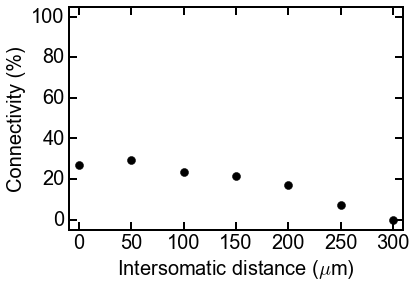

In [2]:
# Load and plot data
xdata, ydata = np.loadtxt('IEprob.dist', comments='//', unpack=1)
plt.plot(xdata, ydata, 'ko', markersize=8);
plt.ylim(-5,105), plt.xlim (-10, 310)
plt.xlabel('Intersomatic distance ($\mu$m)');
plt.ylabel('Connectivity (%)');

<H2>Fitting to a monoexponential function</H2>

In [3]:
# define the fitting function
def mymonoexp(x, Amp, tau):
    """
    solves for the following function:
    f(x; Amp, tau, c )= Amp * exp( -x/tau )
    
    where x is the independent variable
    Amp is the amplitude
    tau is the distance constant (1/ distance constant,tau)
    
    """
    return Amp*np.exp(-x/tau)

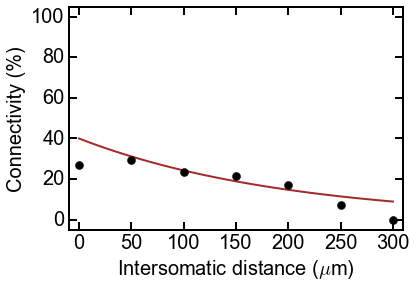

In [4]:
# plot a suggestion with data
x = np.linspace(0, 300, 100)
y = mymonoexp(x, Amp = 40, tau = 200)
plt.plot(x,y, color='brown');


xdata, ydata = np.loadtxt('IEprob.dist', comments='//', unpack=1)
plt.plot(xdata, ydata, 'ko', markersize=8);
plt.ylim(-5,105), plt.xlim (-10, 310)
plt.xlabel('Intersomatic distance ($\mu$m)');
plt.ylabel('Connectivity (%)');


In [5]:
# perform best fit
# fit to the function
pinit = [40, 200]
popt, pcov = curve_fit(mymonoexp, xdata, ydata, p0 = pinit)
 
myamp = popt[0]
mytau = popt[1]


print('Amp = %2.4f'%myamp)
print('tau = %2.4f'%mytau)

Amp = 32.1212
tau = 228.7038


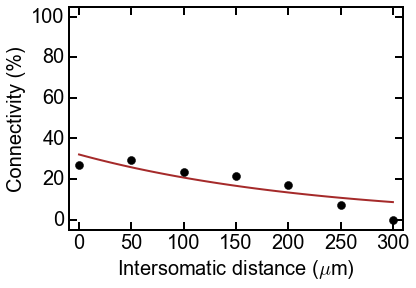

In [6]:
# plot fit and data together
# plot a suggestion with data
xfit = np.linspace(0, 300, 100)
yfit = mymonoexp(x, Amp = myamp, tau = mytau)
plt.plot(xfit,yfit, color='brown');


xdata, ydata = np.loadtxt('IEprob.dist', comments='//', unpack=1)
plt.plot(xdata, ydata, 'ko', markersize=8);
plt.ylim(-5,105), plt.xlim (-10, 310)
plt.xlabel('Intersomatic distance ($\mu$m)');
plt.ylabel('Connectivity (%)');

<H2>Logistic grow model</H2>

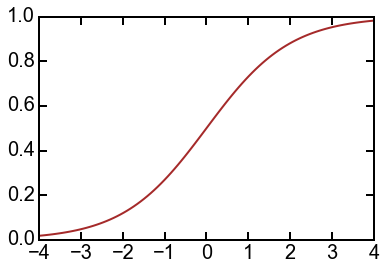

In [7]:
# define the fitting function
def sigmoid(x):
    """
    solves for the following function:
    f(x )= 1/ (1+ exp(-x)
    
    where x is the independent variable

    
    """
    return 1/(1 + np.exp(-x))

# plot a suggestion with data
x = np.linspace(-4, 4, 100)
y = sigmoid(x)
plt.plot(x,y, color='brown');

<H2> Sigmoid-like functions </H2>

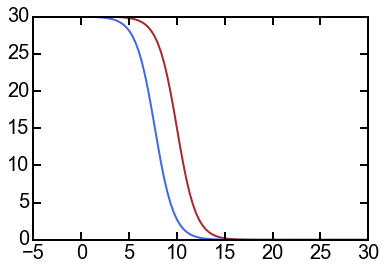

In [8]:
# define the fitting function
def logistic_grow2(x, A, B, r):
    """
    solves for the following function:
    f(x; A, B, r )= A/ (1+ B*exp(-r*x)
    
    where x is the independent variable
    A is the maximal amplitude of the curve
    r is rate of maximum population growth
    
    
    """
    x = x - 10
    return A/(1 + B*np.exp(r*(x)))

# plot a suggestion with data
x = np.linspace(-3, 30, 100)
y = logistic_grow2(x, A = 30, B=1, r=1) # red
y2 = logistic_grow2(x, A = 30, B=10, r=1) # blue
plt.plot(x,y, color='brown');
plt.plot(x,y2, color='royalblue');

In [14]:
def sigmoid2(x, A, B, C, r):
    """
    Sigmoid function with offset (B) and half-width (C) parameters
    """
    return B + ( A  / ( 1 + np.exp((x-C)/r)))
    

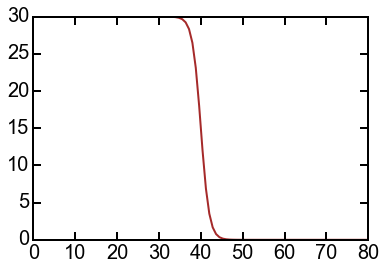

In [15]:
x = np.linspace(-0, 80, 100)
y = sigmoid2(x, A = 30, B=0, C=40, r=1) # red

plt.plot(x,y, color='brown');


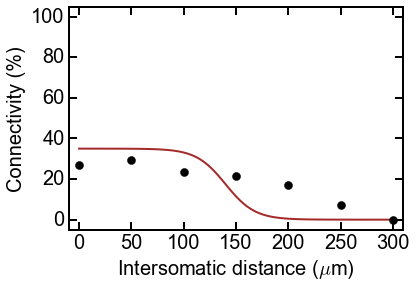

In [16]:
# plot a suggestion with data
x = np.linspace(0, 300, 100)
y = sigmoid2(x, A = 35, B = 0, C = 140, r =14)
plt.plot(x,y, color='brown');


xdata, ydata = np.loadtxt('IEprob.dist', comments='//', unpack=1)
plt.plot(xdata, ydata, 'ko', markersize=8);
plt.ylim(-5,105), plt.xlim (-10, 310)
plt.xlabel('Intersomatic distance ($\mu$m)');
plt.ylabel('Connectivity (%)');

In [17]:
# perform best fit
# fit to the function
pinit = [40, 0, 140, 14]
popt, pcov = curve_fit(sigmoid2, xdata, ydata, p0 = pinit)
 
print(popt)

[  42.30777625  -13.7169904   252.8789856    62.2417575 ]


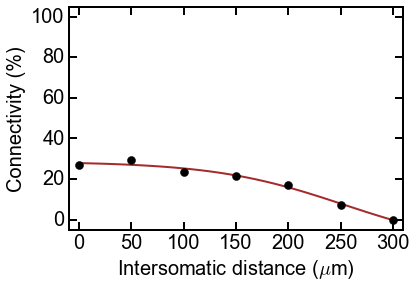

In [18]:
# plot fit and data together
# plot a suggestion with data
xfit = np.linspace(0, 300, 100)
yfit = sigmoid2(x, A = popt[0], B = popt[1], C = popt[2], r=popt[3])
plt.plot(xfit,yfit, color='brown');


xdata, ydata = np.loadtxt('IEprob.dist', comments='//', unpack=1)
plt.plot(xdata, ydata, 'ko', markersize=8);
plt.ylim(-5,105), plt.xlim (-10, 310)
plt.xlabel('Intersomatic distance ($\mu$m)');
plt.ylabel('Connectivity (%)');